In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import accuracy_score,cohen_kappa_score

In [3]:
# loading the raw data
bc=pd.read_csv("data.csv")
bc.head()  
P=bc.iloc[:,2:32]


In [7]:
yd=pd.get_dummies(bc.diagnosis)
y=yd.M
y.head() # response variable

0    1
1    1
2    1
3    1
4    1
Name: M, dtype: uint8

In [8]:
# standardizing and PCA
scaler = StandardScaler()
P_scaled=scaler.fit_transform(P)
P_scaled=pd.DataFrame(P_scaled)
PP=P_scaled.drop(P_scaled.columns[[2, 3, 22, 23, 12, 13]], axis=1) 
pca=PCA(n_components=0.95)
P_pca=pca.fit_transform(PP)
print (P_pca.shape)
print(pca.explained_variance_ratio_) 
print (pca.explained_variance_ratio_.sum())


(569, 11)
[0.42661046 0.15932139 0.10294428 0.07788731 0.06489774 0.05015242
 0.02145044 0.0187846  0.01505759 0.01197751 0.01117206]
0.960255820189289


In [32]:
n=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','diagnosis']
d=bc.iloc[:,1:2]  # diagnosis column
#merging the reduced data with diagnosis column
Xy=pd.DataFrame(np.hstack([P_pca,d.values]),columns=n)

In [31]:
from sklearn.model_selection import train_test_split
#predictor X
X=(Xy.iloc[:,0:11]).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [34]:
from sklearn.linear_model import LogisticRegression
reg =LogisticRegression(random_state=0)
reg.fit(X_train, y_train)
prediction = reg.predict(X_test)

C:\Users\GKini\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [19]:
print(reg.score(X_test,y_test))

0.972027972027972


C:\Users\GKini\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression:
confusion matrix
 [[89  1]
 [ 3 50]] 


Confusion matrix plot of Logistic regression


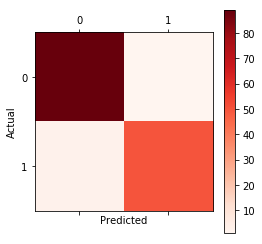


 Classification report 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        90
           1       0.98      0.94      0.96        53

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [28]:
lgr=LogisticRegression(C=1)
lgr.fit(X_train, y_train)
y_pred_lgr =lgr.predict(X_test)
# computing and plotting confusion matrix
c_m = confusion_matrix(y_test, prediction)
print('Logistic Regression:\nconfusion matrix\n', c_m,'\n\n')
ax=plt.matshow(c_m,cmap=plt.cm.Reds)
print('Confusion matrix plot of Logistic regression')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# classification report
print('\n Classification report \n',classification_report(y_test, prediction))

In [22]:
accuracy_score(y_test, prediction, normalize=True, sample_weight=None)

0.972027972027972

In [35]:
cohen_kappa_score(y_test, prediction, labels=None, weights=None, sample_weight=None)

0.9395732093809424